In [1]:
from torchvision import transforms, models 
import torch

import warnings
warnings.filterwarnings(action='ignore')


from data.camMethods import imageMapping
from data.camMethods import preprocessingImage
from data.camMethods import visualizationCAM
from data.camMethods import camMethod
from data.camMethods import camForSet
from data.Hook import actLayerMethod
from data.Hook import maxActivisionValue
from data.Hook import weightFromLayer

from data.Visual import Visual

Microsoft Visual C++ Redistributable is not installed, this may lead to the DLL load failure.
                 It can be downloaded at https://aka.ms/vs/16/release/vc_redist.x64.exe


C:\anaconda\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] Не найдена указанная процедура
  warn(f"Failed to load image Python extension: {e}")


In [2]:
PATH_TO_SET = 'dataset/catset'

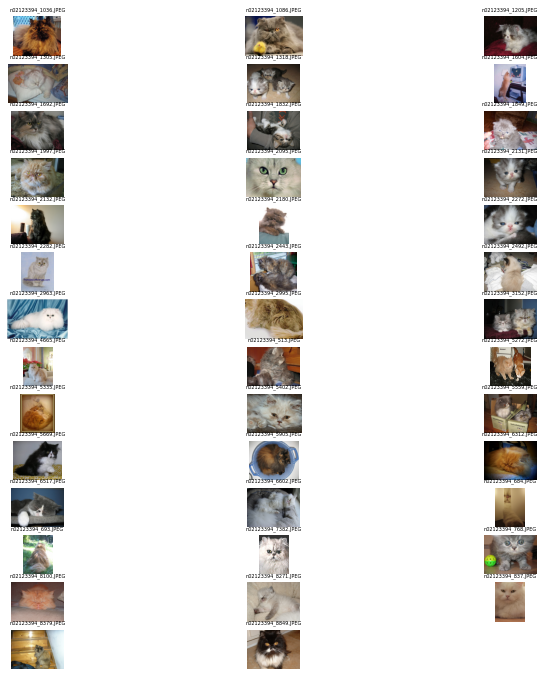

In [3]:
listImage = imageMapping(PATH_TO_SET)  

In [4]:
preprocessingList = preprocessingImage(listImage)
print(len(preprocessingList), '\n', preprocessingList[0].shape)

41 
 torch.Size([1, 3, 224, 224])


In [5]:
model = models.resnet50()
model.load_state_dict(torch.load('model_parameters/resnet50-0676ba61.pth'))
model.eval()
print()

In [6]:
features, predictionList = actLayerMethod(model, preprocessingList)                                       
print('act_len', len(features), '\nact_shape:', features[0].size())

act_len 41 
act_shape: torch.Size([1, 2048, 7, 7])


In [7]:
indexNumpy = maxActivisionValue(predictionList)

In [8]:
weight = weightFromLayer(model, 'fc')

In [9]:
camFromPictures = camForSet(features, weight, indexNumpy)
print('size of map:', camFromPictures[0].shape, '\nlen of map_pictures:', len(camFromPictures))
print(type(camFromPictures[0]))

size of map: (7, 7) 
len of map_pictures: 41
<class 'numpy.ndarray'>


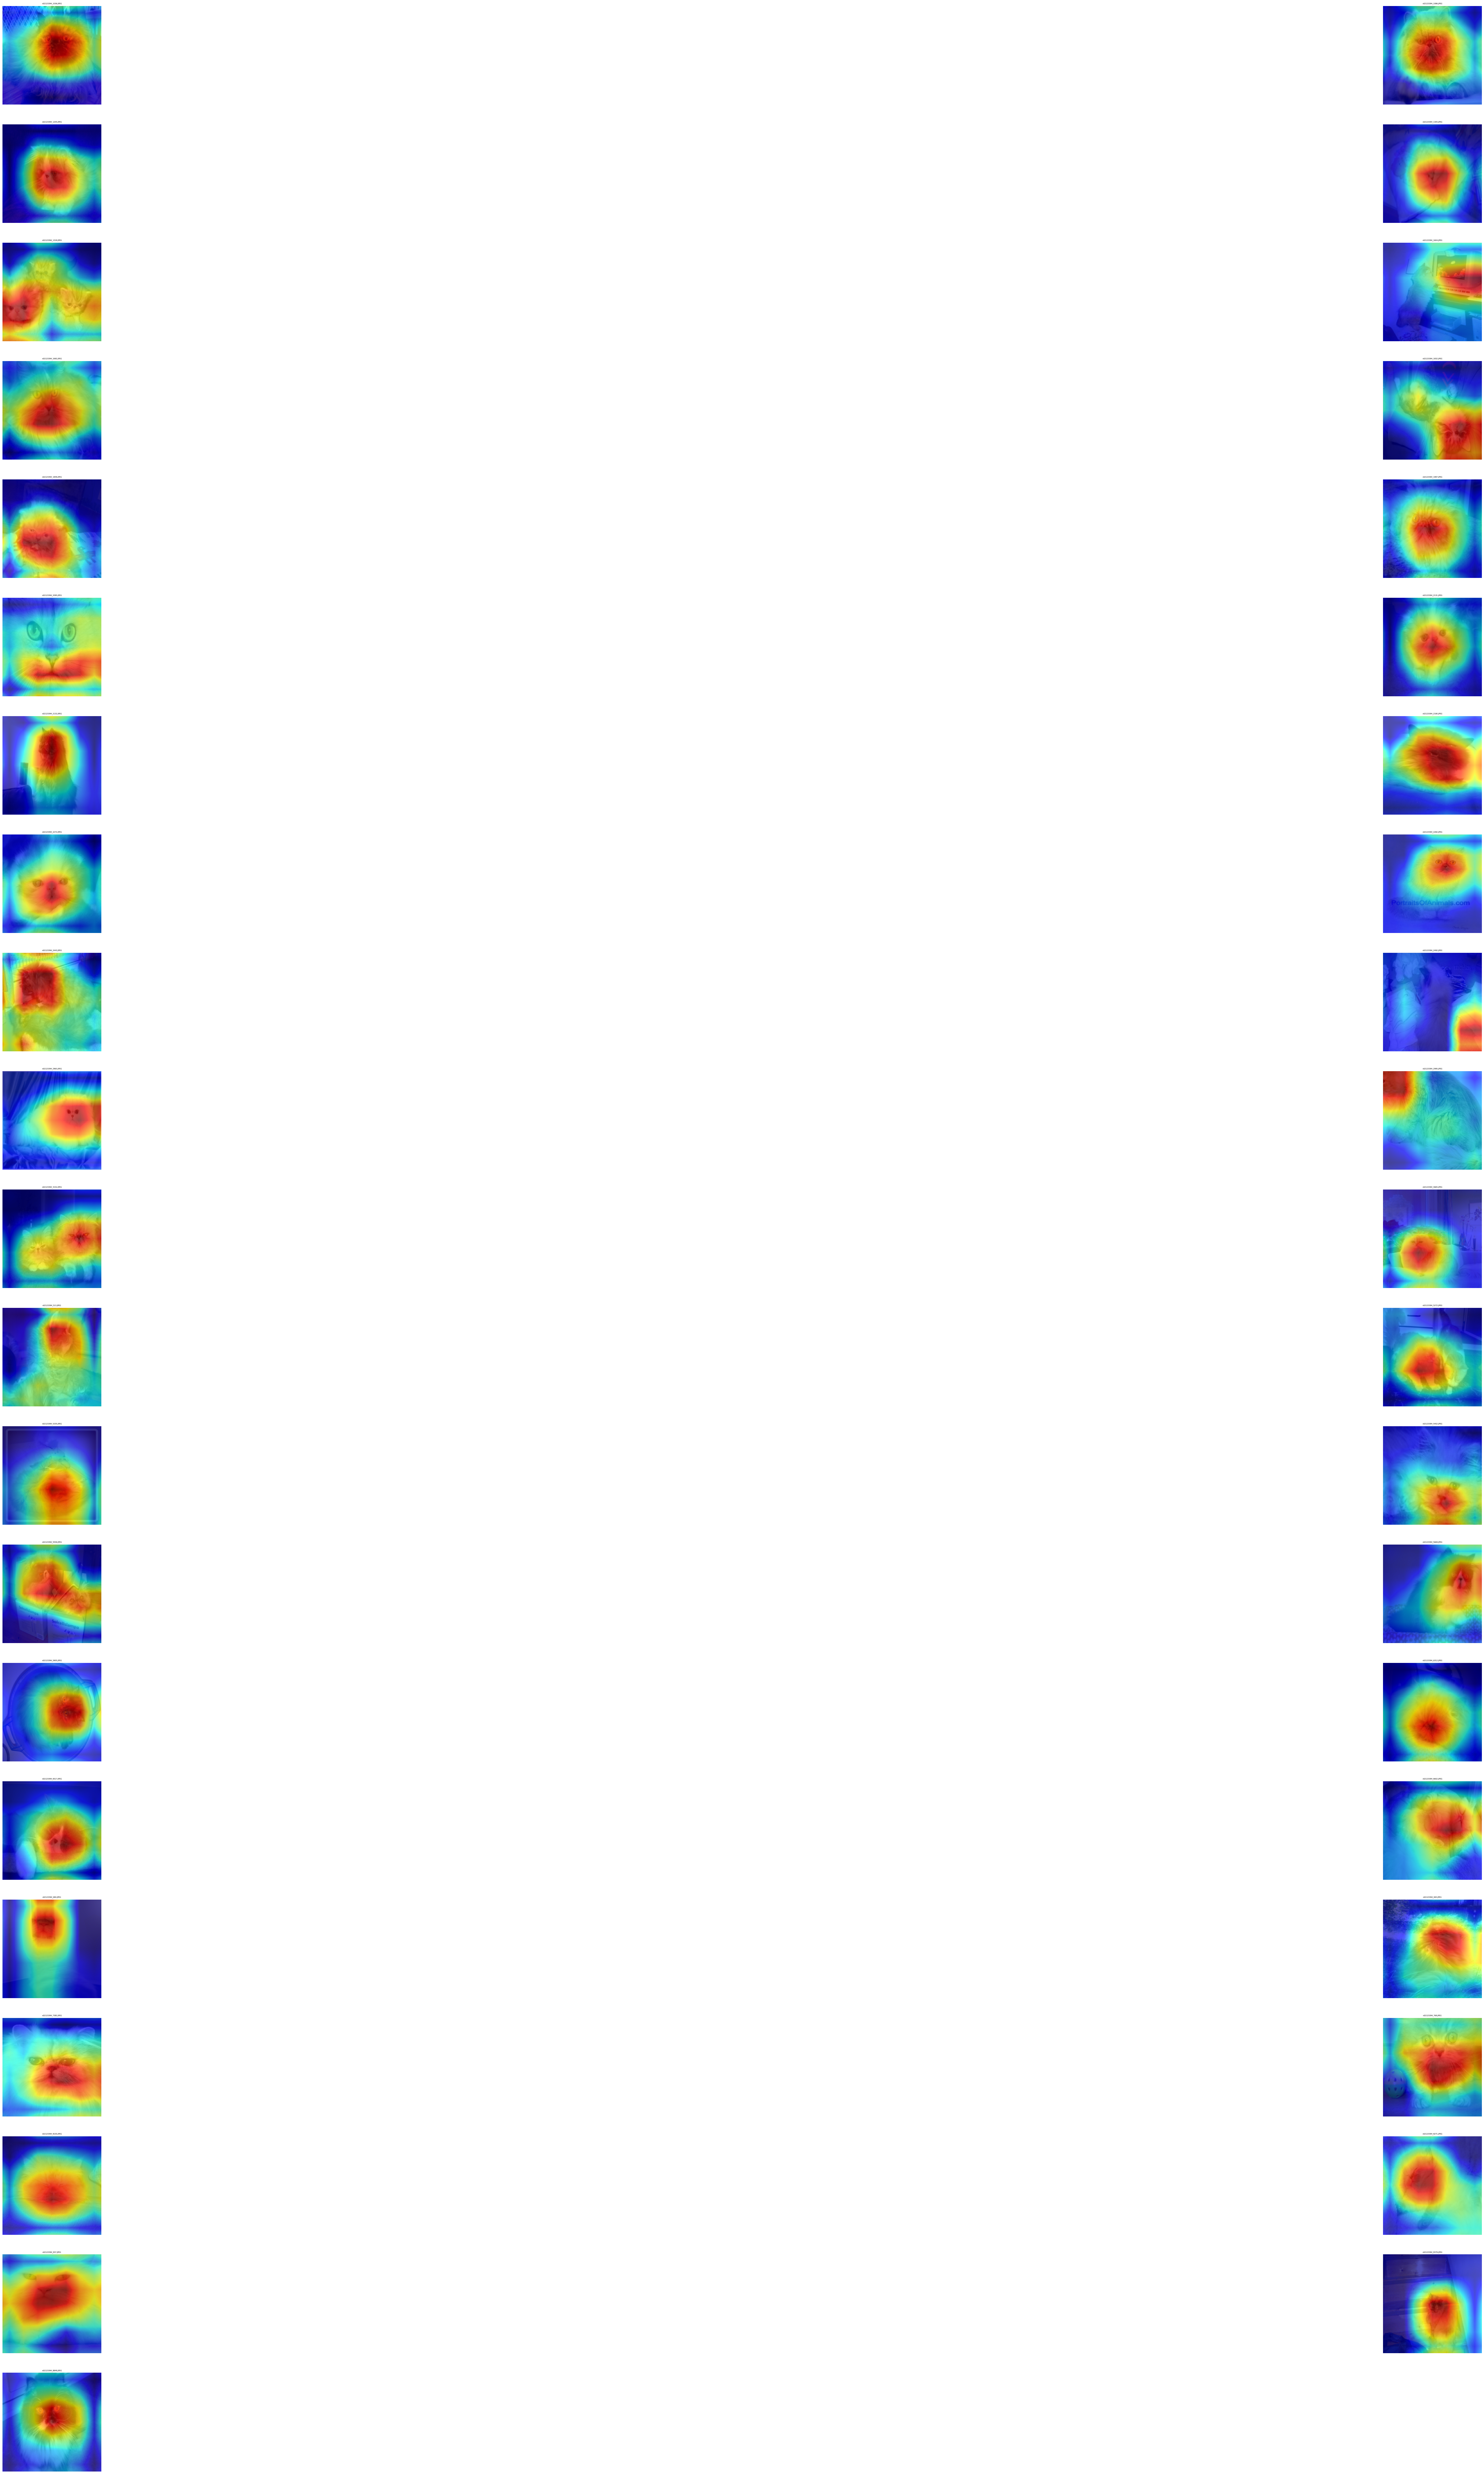

In [10]:
visualizationCAM(PATH_TO_SET, camFromPictures)

ValueError: object too deep for desired array

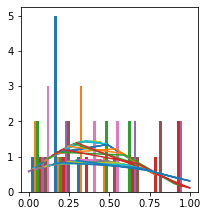

In [11]:
#Not override ???
vis = Visual(PATH_TO_SET, camFromPictures)
vis.visualization()